## CIT 3100 - Lab 4: Python and Pandas Lab (with Pokemon)
### Do File/Save a Copy in Drive to make your own copy of this Notebook.

#### 1. Importing Pandas and Read in the Data. Run both code cells below by clicking on the [ ] play button next to them. This also renames some columns so they are 1 word.



In [ ]:
import pandas as pd

In [ ]:
pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv', encoding = "ISO-8859-1")
pokemon.rename(columns = {'Type 1':'Type1', 'Type 2':'Type2', 'Sp. Atk':'SpAtk', 'Sp. Def':'SpDef'}, inplace = True)
pokemon

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


The **Total** column is calculated by adding all of the points from the other categories, so Total = HP	+ Attack + Defense + SpAtk + SpDef + Speed. Note that Generation is **not** included in this calculation.

#### 2. Exploring the Data Frame

*   Try `pokemon.head()` and `pokemon.tail()` and `pokemon.columns`
*   Try `pokemon.describe()` to get stats
*   Try printing just the Name column using `pokemon.Name` and then just the `Type1` column



In [ ]:
pokemon.head()
pokemon.tail()
pokemon.describe()
pokemon.Name
pokemon.Type1

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type1, Length: 800, dtype: object

#### 3. Exploring Columns
- use some functions of the form `pokemon.columnName.function()`, for example `pokemon.HP.describe()` or `pokemon.HP.min()`

- In the pokemon hit points (`HP`) column, what is the min, max, and average (mean) HP for Pokemon?

In [ ]:
pokemon.HP

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [ ]:
pokemon.HP.describe()
pokemon.HP.min()
pokemon.HP.max()
pokemon.HP.mean()

69.25875

#### 4. Filtering/Subsets
- Use filters of the form `pokemon[pokemon.columnName == (or <, <=, >, >=) value]`
- For example, `pokemon[pokemon.HP >= 175]` or `pokemon[pokemon.HP == pokemon.HP.max()]`

Which Pokemon has HP greater than or equal to 175?

In [ ]:
pokemon[pokemon.HP >= 175]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


Which pokemon has the highest HP?




In [ ]:
pokemon[pokemon.HP == pokemon.HP.max()]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


What is the fastest pokemon Speed?

In [ ]:
pokemon[pokemon.Speed == pokemon.Speed.max()]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


Which Pokemon is the slowest?

In [ ]:
pokemon[pokemon.Speed == pokemon.Speed.min()]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False


Which Pokemon has the most total points?

In [ ]:
pokemon[pokemon.Total == pokemon.Total.max()]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


List the pokemon that have Type1 of 'Fighting'. Also, you can use the `len()` command to find out how many there are in this dataset.




In [ ]:
pokemon[pokemon.Type1 == 'Fighting']
len(pokemon[pokemon.Type1 == 'Fighting'])

27

### 5. Group By

Try the following code which will group averages by Types of Pokemon. This is like COUNTIF in spreadsheets or aggregate in R. Then, the next code cell sorts them to be in order.

In [ ]:
types_df = pokemon.groupby('Type1')['Total','HP','Speed'].mean()
types_df

<ipython-input-14-ec85dd009903>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  types_df = pokemon.groupby('Type1')['Total','HP','Speed'].mean()


,Total,HP,Speed
Type1,,,
Bug,378.927536,56.884058,61.681159
Dark,445.741935,66.806452,76.161290
Dragon,550.531250,83.312500,83.031250
Electric,443.409091,59.795455,84.500000
Fairy,413.176471,74.117647,48.588235
Fighting,416.444444,69.851852,66.074074
Fire,458.076923,69.903846,74.442308
Flying,485.000000,70.750000,102.500000
Ghost,439.562500,64.437500,64.343750


Example of a sort which shows which Type has the highest total points.

In [ ]:
types_df.sort_values('Total', ascending=False)

,Total,HP,Speed
Type1,,,
Dragon,550.531250,83.312500,83.031250
Steel,487.703704,65.222222,55.259259
Flying,485.000000,70.750000,102.500000
Psychic,475.947368,70.631579,81.491228
Fire,458.076923,69.903846,74.442308
Rock,453.750000,65.363636,55.909091
Dark,445.741935,66.806452,76.161290
Electric,443.409091,59.795455,84.500000
Ghost,439.562500,64.437500,64.343750


Which Type has the fastest average Speed? (You can do this with groupby or sort)

In [ ]:
types_df.sort_values('Speed',ascending=False) # have the highest one first
types_df.sort_values('Speed',ascending=False).iloc[0,:] # To locate specifically the first one and his collumns

Total    485.00
HP        70.75
Speed    102.50
Name: Flying, dtype: float64

#### 6. Lookup Example

Suppose we wanted to give a pokemon name, and get the type of that pokemon back.

In [ ]:
pd.Series(pokemon.Type1)

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type1, Length: 800, dtype: object

In [ ]:
lookup = pd.Series(pokemon.Type1.values, index = pokemon.Name)
lookup

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Length: 800, dtype: object

What does Zapdos have as its main type (type 1)?

In [ ]:
lookup['Zapdos']

'Electric'

Write code to create a Series for the pokemon Generation indexed by Name and lookup a specific pokemon's generation.

In [ ]:
lookup = pd.Series(pokemon.Generation.values, index = pokemon.Name)
lookup

Name
Bulbasaur                1
Ivysaur                  1
Venusaur                 1
VenusaurMega Venusaur    1
Charmander               1
                        ..
Diancie                  6
DiancieMega Diancie      6
HoopaHoopa Confined      6
HoopaHoopa Unbound       6
Volcanion                6
Length: 800, dtype: int64

In [ ]:
lookup = pd.Series(pokemon.Generation.values, index = pokemon.Name)
lookup['Zapdos']

1

### 7. Data Viz

Try a histogram. Then change it to be a histogram of Speed.

array([[<Axes: title={'center': 'Speed'}>]], dtype=object)

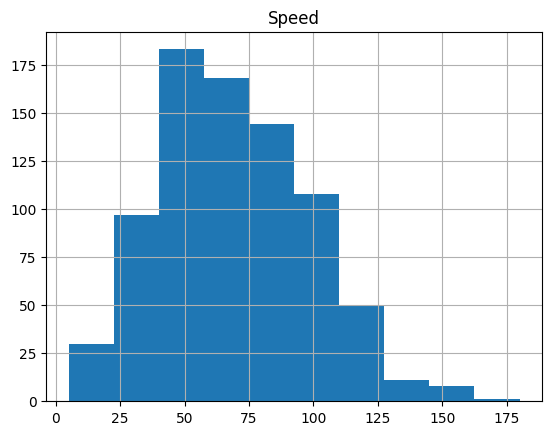

In [ ]:
# pokemon.hist('Total')
pokemon.hist('Speed')

Try a line plot of Type1 vs Total Points. Change it to show Type1 vs. Speed.

<Axes: xlabel='Type1'>

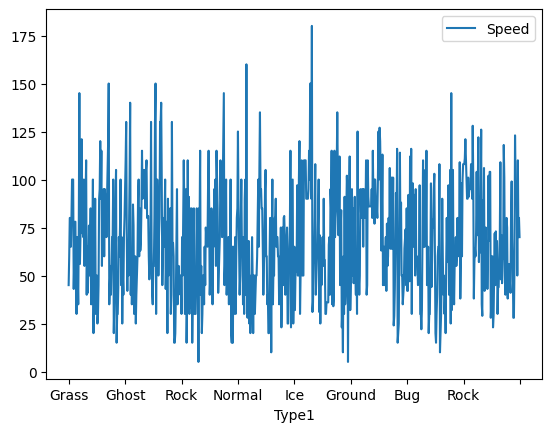

In [ ]:
# pokemon.plot('Type1','Total')
pokemon.plot('Type1','Speed')

Finally, try another graph of your own choice! You can try a scatter plot, a boxplot, multiple side by side boxplots in one image, a pie chart, etc. This website has a lot of helpful hints for plotting with `pandas`: https://pandas.pydata.org/docs/user_guide/visualization.html

Specifically, it notes the following plotting functions within `pandas`, and gives examples of each:
```
df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie
```

Have fun with it! Feel free to add colors, a title, etc. You are free to try another plotting library instead, such as `matplotlib` and/or `seaborn`, but this is optional!

<Axes: xlabel='Generation', ylabel='Total'>

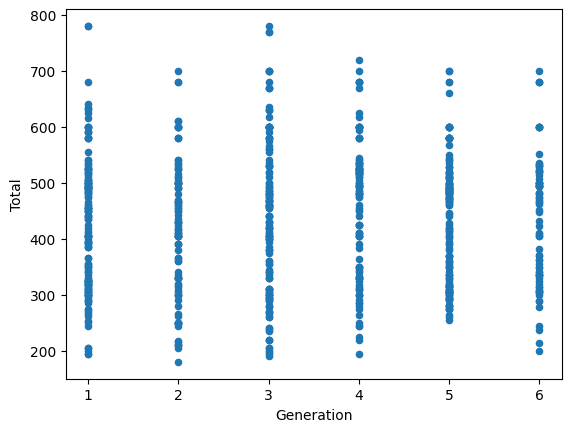

In [ ]:
pokemon.plot.scatter('Generation','Total')

### 8. Share your results!!!
**Click on Share at the top right, change it to Elms or Anyone can view, and copy the url and paste into the assignment in Moodle to turn in this lab.**

For some fun, try the settings gear, misc., and corgi/kitty mode. Learn more about Python Pandas here: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html